Import perpustakaan


In [1]:
import pandas as pd  #Untok olah data Excel, CSV
import numpy as np #Sama saja dengan pandas namun versinya lebih sederhana
import sqlalchemy as db #Ini untuk SQL
import matplotlib.pyplot as plt #Ini Untuk Plot gambar
import seaborn as sns #Ini untuk plot gambar juga

Panggil database data_hujan.sqlite

In [2]:
database = db.create_engine("sqlite:///database_HIV_AIDS.sqlite")
conn = database.connect()

Kita mencoba panggil data dari SQLdatabasenya dan gabungan data menjadi 1

,Wilayah,CH,Temp
0,Sumatera,34,22
1,Sumatera,34,22
2,Sumatera,34,23
3,Sumatera,34,34
4,Sumatera,34,45
...,...,...,...
607,Jawa Tengah,67,55
608,Jawa Tengah,67,64
609,Jawa Tengah,67,66
610,Jawa Tengah,67,99


In [5]:
#Menggunakan CTE
data_gabungan_2 = """ 
  WITH data_x AS (
      SELECT
        a1.Wilayah,
        a1.CH,
        a2.Temp
      FROM data_hujan a1
      LEFT JOIN data_temperatur a2 ON a1.CH = a2.CH
  )

  SELECT * FROM data_x
"""
data_CTE = pd.read_sql_query(data_gabungan_2,conn)
data_CTE

,Wilayah,CH,Temp
0,Sumatera,34,22
1,Sumatera,34,22
2,Sumatera,34,23
3,Sumatera,34,34
4,Sumatera,34,45
...,...,...,...
607,Jawa Tengah,67,55
608,Jawa Tengah,67,64
609,Jawa Tengah,67,66
610,Jawa Tengah,67,99


Bersihkan Data

In [6]:
data_CTE.to_csv("data_gabungan_final", index=None) # Gabungkan data

In [7]:
data_mentah = pd.read_csv("data_gabungan_final.csv")
data_mentah

,Wilayah,CH,Temp
0,Sumatera,34,22
1,Sumatera,34,22
2,Sumatera,34,23
3,Sumatera,34,34
4,Sumatera,34,45
...,...,...,...
607,Jawa Tengah,67,55
608,Jawa Tengah,67,64
609,Jawa Tengah,67,66
610,Jawa Tengah,67,99


Menentukan Wilayah Cakupan

In [8]:
data_wilayah = data_mentah['Wilayah'].drop_duplicates()
data_wilayah

0        Sumatera
10    DKI Jakarta
22     Kalimantan
33    Jawa Tengah
44     Jawa Timur
Name: Wilayah, dtype: object

In [9]:
data_wilayah = pd.unique(data_wilayah)
data_wilayah

array(['Sumatera', 'DKI Jakarta', 'Kalimantan', 'Jawa Tengah',
       'Jawa Timur'], dtype=object)

Rata - rata curah hujan ditiap wilayah

In [10]:
data_curah_hujan =data_CTE.groupby("Wilayah") # Ambil Wilayah dulu
data_curah_hujan_avg = data_curah_hujan.agg(
  rata_rata = ("CH","mean")
)
data_curah_hujan_avg_fix = data_curah_hujan_avg.reset_index()
data_curah_hujan_avg_fix


,Wilayah,rata_rata
0,DKI Jakarta,42.000000
1,Jawa Tengah,67.016393
2,Jawa Timur,55.590164
3,Kalimantan,34.868852
4,Sumatera,39.588235


Wilayah Mana yang memiliki curah hujan tertinggi

In [11]:
data_curah_hujan_max = data_CTE.groupby("Wilayah") # Ambil Wilayah dahulu
data_curah_hujan_sum = data_curah_hujan_max.agg(
  jumlah = ("CH", "sum")
)

data_curah_hujan_sum = data_curah_hujan_sum.reset_index() 
data_curah_hujan_sum.loc[data_curah_hujan_sum["Wilayah"].idxmax()]

Wilayah    Sumatera
jumlah         4038
Name: 4, dtype: object

Tiga Wilayah dengan Curah Hujan tertinggi

In [12]:
data_curah_hujan_sum_3 = data_curah_hujan_sum.nlargest(3, "jumlah")
data_curah_hujan_sum_3

,Wilayah,jumlah
1,Jawa Tengah,8176
2,Jawa Timur,6782
0,DKI Jakarta,6048


Tiga Wilayah dengan Curah Hujan Terendah

In [13]:
data_curah_hujan_sum_4 = data_curah_hujan_sum.nsmallest(3,"jumlah")
data_curah_hujan_sum_4

,Wilayah,jumlah
4,Sumatera,4038
3,Kalimantan,4254
0,DKI Jakarta,6048


Plot Rata_rata ditiap wilayah

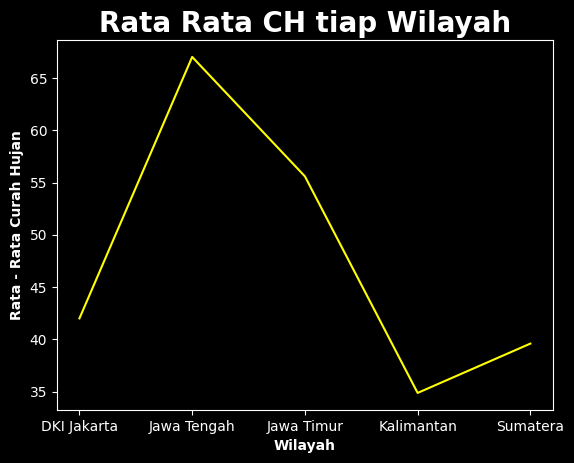

In [15]:
plt.style.use('dark_background')
sns.lineplot(
  data= data_curah_hujan_avg_fix,
  x = "Wilayah",
  y = "rata_rata",
  markers="0",
  color = "yellow"
)
plt.title("Rata Rata CH tiap Wilayah", fontsize = "20", fontweight = "bold")
plt.xlabel("Wilayah",fontweight = "bold")
plt.ylabel("Rata - Rata Curah Hujan",fontweight = "bold")
plt.savefig("output.png")
plt.show()